In [31]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import metrics
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [32]:
X = pd.read_csv("users_to_classify.csv", usecols = ["mean_lieks","mean_retweets","replies_mean",
                                                    "tweets_num","sentiment_mean","mentions","hashtags"])
X = X.fillna(0)
y = pd.read_csv("users_to_classify.csv", usecols = ["class"])

In [42]:
clf = DecisionTreeClassifier(random_state=0,max_depth=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = clf.fit(X_train, y_train)

In [43]:
y_pred = clf.predict(X_test)

In [44]:
def print_metrics(y_test, y_pred):
    print("Model accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Model precision:", metrics.precision_score(y_test, y_pred, average='macro'))
    print("Model recall:", metrics.recall_score(y_test, y_pred, average='macro'))
    print("Model F1 score:", metrics.f1_score(y_test, y_pred, average='macro'))

In [45]:
print_metrics(y_test,y_pred)

Model accuracy: 0.5614035087719298
Model precision: 0.6005952380952381
Model recall: 0.5284313725490196
Model F1 score: 0.5295126122712329


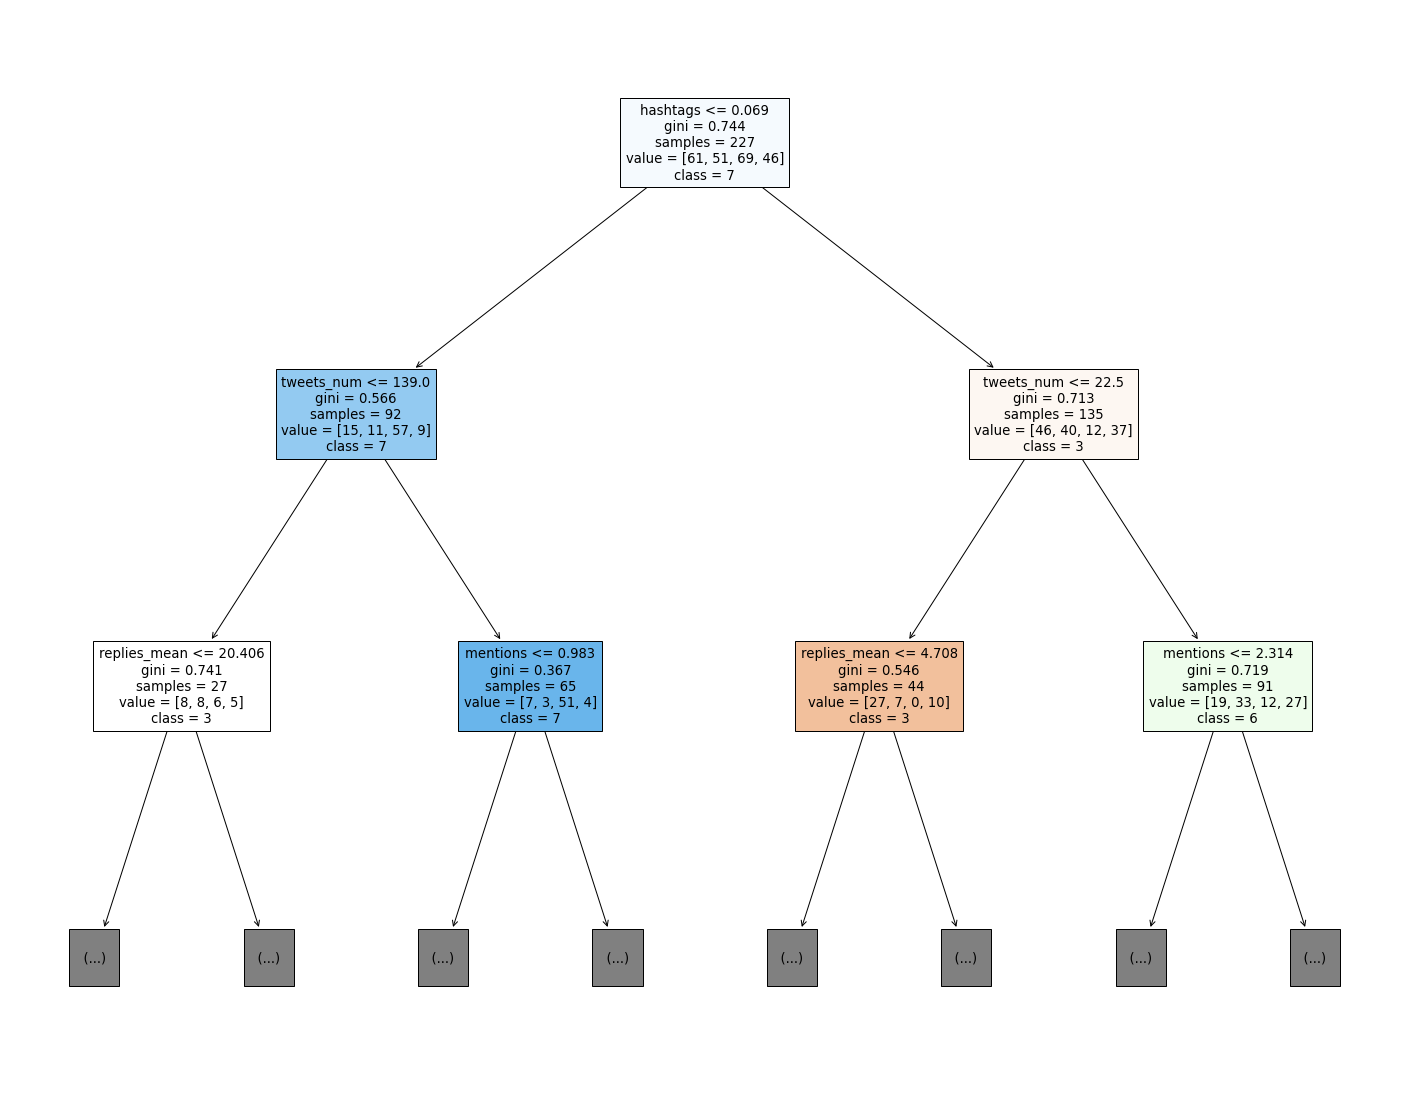

In [52]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf, feature_names= ["mean_lieks","mean_retweets","replies_mean",
                                                    "tweets_num","sentiment_mean","mentions","hashtags"],  
                   class_names=['3','6','7','9'],
                   filled=True,max_depth=2)